<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/19_4_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. [Keras v3. Современные подходы к CV (компьютерное зрение)](https://colab.research.google.com/drive/16ks3VjO38c7N4kXUsrdzUbunJOxRu3Fq)
2. [Перенос обучения в Keras 3.0](https://colab.research.google.com/drive/1x2qd4MvG3ODgNrE2uqxRAZB70dGgdGft)
3. [Знакомство с KerasCV](https://colab.research.google.com/drive/1ZWfrEDQaQqDmVUF0yk7N4yoMHRkXf9K-)
4. Домашняя работа

В домашней работе вам необходимо, используя пример из урока 19.2 и Keras 3, произвести тонкую настройку модели второй версии [EfficientNetV2](https://keras.io/api/applications/efficientnet_v2/) на примере набора данных [Stanford Dogs](https://storage.yandexcloud.net/academy.ai/stanford_dogs.zip).

Баллы за задание начисляются следующим образом:
* 3 балла - дается за успешно выполненное задание с точностью на проверочной выборке не менее 75%, в задании должна быть проведена аугментация данных.
* Для получения 4-х баллов необходимо добиться, чтобы точности на проверочной и тестовой выборках были выше 75%.
* Для получения 5-ти баллов необходимо случайным образом отобрать 10 пород собак, выполнить аугментацию и добиться точности как на обучающей, так и проверочной выборках более 85%.

In [ ]:
!pip install --upgrade keras==3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 3.0.0 which is incompatible.


In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/stanford_dogs.zip

--2024-11-13 04:47:45--  https://storage.yandexcloud.net/academy.ai/stanford_dogs.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 774907490 (739M) [application/x-zip-compressed]
Saving to: ‘stanford_dogs.zip’

stanford_dogs.zip   100%[===================>] 739.01M  8.16MB/s    in 81s     

2024-11-13 04:49:08 (9.13 MB/s) - ‘stanford_dogs.zip’ saved [774907490/774907490]



In [ ]:
# Разархивируем датасета во временную папку 'temp'
!unzip -qo "stanford_dogs" -d ./dataset

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH_SOURCE = "./dataset/"

In [ ]:
import keras

print(keras.__version__)

3.0.0


In [ ]:
import os
import random

import keras
import matplotlib.pyplot as plt
from keras import layers
from keras.applications import EfficientNetV2B0

%matplotlib inline
from tensorflow import data as tf_data

IMAGE_SIZE = (224, 224)  # Размер определен выбором модели
BATCH_SIZE = 128
TEST_BATCH = 1

In [ ]:
num_skipped = 0  # счетчик поврежденных файлов
for folder_name in os.listdir(IMAGE_PATH_SOURCE):  # перебираем папки
    folder_path = os.path.join(IMAGE_PATH_SOURCE, folder_name)  # склеиваем путь
    for fname in os.listdir(folder_path):  # получаем список файлов в папке
        fpath = os.path.join(folder_path, fname)  # получаем путь до файла
        try:
            fobj = open(fpath, "rb")  # пытаемся открыть файл для бинарного чтения (rb)
            is_jfif = (
                b"JFIF" in fobj.peek(10)
            )  # получаем первые 10 байт из файла и ищем в них бинарный вариант строки JFIF
        finally:
            fobj.close()  # Закрываем файл

        if not is_jfif:  # Если не нашли JFIF строку
            # Увеличиваем счетчик
            num_skipped += 1
            # Удаляем поврежденное изображение
            os.remove(fpath)

print(f"Удалено изображений: {num_skipped}")

Удалено изображений: 10


In [ ]:
# Определяем список имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH_SOURCE))
SELECTED_CLASSES = random.sample(CLASS_LIST, 10)

# Определяем количества классов
CLASS_COUNT = len(SELECTED_CLASSES)

# Create a new directory for selected classes
IMAGE_PATH = "./dataset_selected/"
os.makedirs(IMAGE_PATH, exist_ok=True)

# Copy selected classes to new directory
# qwe
for class_name in SELECTED_CLASSES:
    src_path = os.path.join(IMAGE_PATH_SOURCE, class_name)
    dst_path = os.path.join(IMAGE_PATH, class_name)
    if os.path.exists(dst_path):
        continue
    os.makedirs(dst_path, exist_ok=True)
    for file_name in os.listdir(src_path):
        src_file = os.path.join(src_path, file_name)
        dst_file = os.path.join(dst_path, file_name)
        os.symlink(os.path.abspath(src_file), dst_file)


# Вывод результата
print(f"Количество всех классов: {len(CLASS_LIST)}")
print(f"Количество выбраных классов: {CLASS_COUNT}")
print(f"Метки классов: {SELECTED_CLASSES}")

Количество всех классов: 120
Количество выбраных классов: 10
Метки классов: ['African_hunting_dog', 'Scottish_deerhound', 'Great_Dane', 'Pekinese', 'Bloodhound', 'Boston_bull', 'Eskimo_dog', 'Dhole', 'Leonberg', 'Walker_hound']


In [ ]:
# Normalize path to string
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    IMAGE_PATH,  # путь к папке с данными
    validation_split=0.2,  # отщепляем 20% на проверочную выборку
    subset="both",  # указываем, что необходимо вернуть кортеж из обучающей и проверочной выборок ("training", "validation" или "both")
    seed=42,  # воспроизводимость результата генерации (результаты с одинаковым числом - одинаковы),
    shuffle=True,  # перемешиваем датасет
    image_size=IMAGE_SIZE,  # размер генерируемых изображений
    batch_size=BATCH_SIZE,  # размер мини-батча
)
test_ds = train_ds.take(TEST_BATCH)
train_ds = train_ds.skip(TEST_BATCH)

Found 1738 files belonging to 10 classes.
Using 1391 files for training.
Using 347 files for validation.


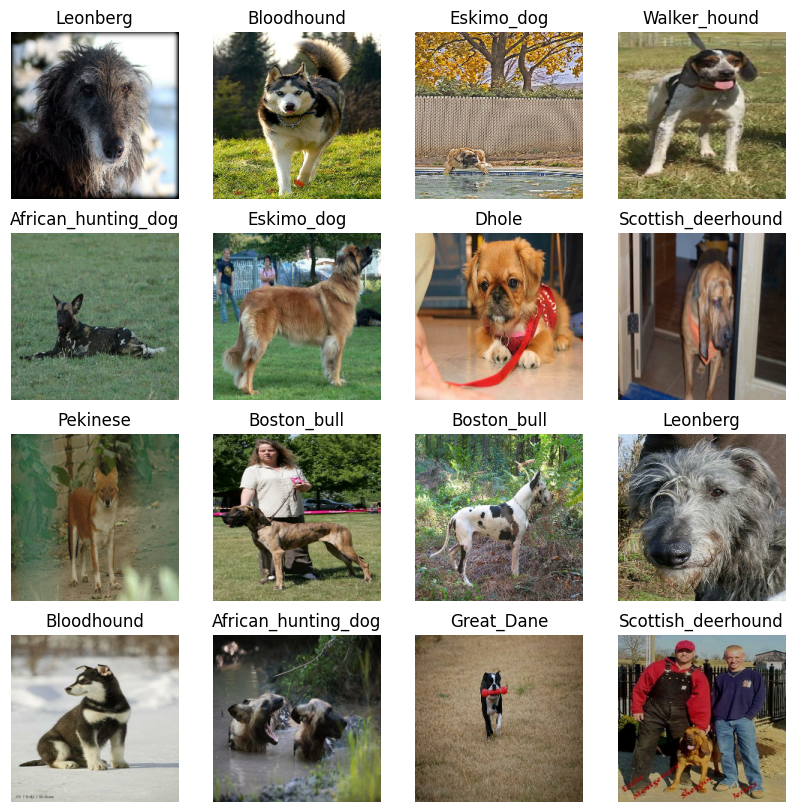

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # берем первый батч обучающей выборки
    for i in range(16):  # отрисуем первые 16 картинок батча
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(keras.utils.img_to_array(images[i]).astype("uint8"))
        plt.title(SELECTED_CLASSES[labels[i]])  # покажем метки
        plt.axis("off")  # отключаем отображение осей

In [ ]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),  # Вращаем изображение в пределах 15%
    layers.RandomTranslation(
        height_factor=0.1, width_factor=0.1
    ),  # Сдвиг на 10% по вертикали и горизонтали
    layers.RandomFlip(),  # Отражение по вертикали и горизонтали
    layers.RandomContrast(factor=0.1),  # Изменяем контрастность на 10%
]


def img_augmentation(images):
    # Слои - это функции, которые мы последовательно применяем к входным данным
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

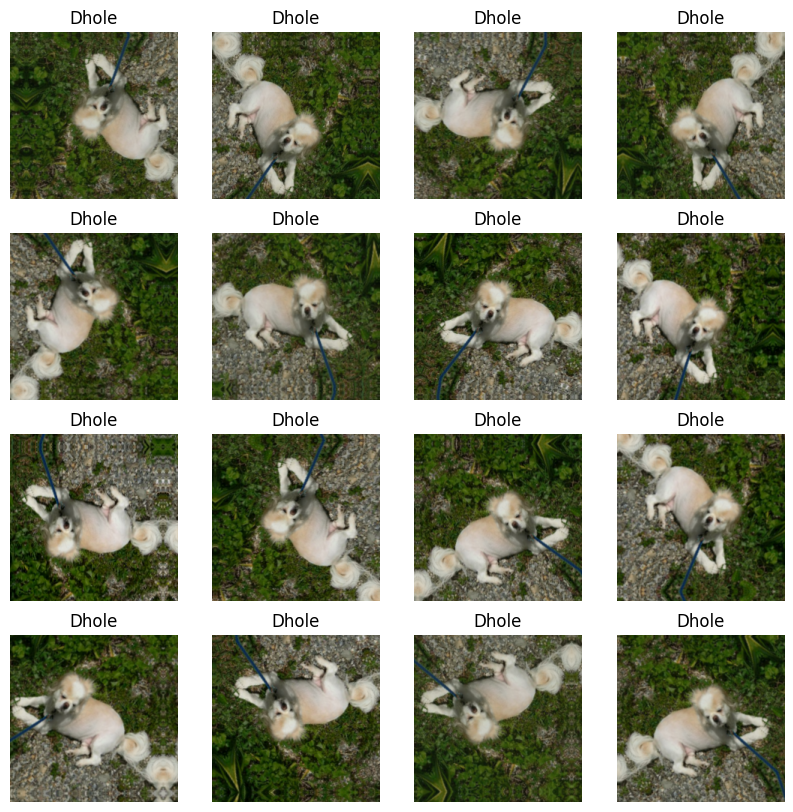

In [ ]:
plt.figure(figsize=(10, 10))
for images, label in train_ds.take(1):
    for i in range(16):
        augmented_images = img_augmentation(images[0])
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(
            keras.utils.img_to_array(augmented_images).astype("uint8")
        )  # Преобразуем картинку в тензор, теперь уже без NumPy
        plt.title("{}".format(SELECTED_CLASSES[label[0]]))  # Вывод метки
        plt.axis("off")

In [ ]:
# Применяем `img_augmentation` к обучающей выборке
train_ds = train_ds.map(
    lambda img, label: (
        img_augmentation(img),
        keras.ops.one_hot(label, CLASS_COUNT),
    ),  # One-hot кодирование
    num_parallel_calls=tf_data.AUTOTUNE,  # число потоков для обработки в map (автонастройка зависит от возможностей процессора)
)

val_ds = val_ds.map(
    lambda img, label: (
        img,
        keras.ops.one_hot(label, CLASS_COUNT),
    ),  # One-hot кодирование
    num_parallel_calls=tf_data.AUTOTUNE,  # число потоков для обработки в map (автонастройка зависит от возможностей процессора)
)

# Предварительная выборка примеров в память GPU или оперативную память
# Помогает максимально эффективно использовать графический процессор
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [ ]:
def show_plot(history):
    acc = history.history["acc"]
    epochs = range(1, len(acc) + 1)
    val_acc = history.history["val_acc"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, "r", label="Точность на обучающей выборке")
    plt.plot(epochs, val_acc, "b", label="Точность на проверочной выборке")
    plt.title("График точности на обучающей и проверочной выборках")
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, "r", label="Потери на обучающей выборке")
    plt.plot(epochs, val_loss, "b", label="Потери на проверочной выборке")
    plt.title("График потерь на обучающей и проверочной выборках")
    plt.legend()
    plt.show()

In [ ]:
def build_model(num_classes):
    inputs = layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    model = EfficientNetV2B0(include_top=False, input_tensor=inputs, weights="imagenet")

    # Заморозка предобученных весов
    model.trainable = False

    # Замена верхних слоев
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(num_classes, activation="softmax", name="pred")(x)

    # Компилируем
    model = keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["acc"])
    return model

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="best_model_pretrain.keras",
        monitor="val_acc",
        save_best_only=True,
        mode="max",
        verbose=0,
    )
]

model = build_model(num_classes=CLASS_COUNT)

# Harper is a grammer checker that is

history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds, callbacks=callbacks
)

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 6s/step - acc: 0.6076 - loss: 1.4597 - val_acc: 0.9769 - val_loss: 0.1109
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.8953 - loss: 0.4410 - val_acc: 0.9683 - val_loss: 0.1062
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 0.9124 - loss: 0.3478 - val_acc: 0.9827 - val_loss: 0.0768
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.9157 - loss: 0.3426 - val_acc: 0.9798 - val_loss: 0.0683
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - acc: 0.9248 - loss: 0.2934 - val_acc: 0.9769 - val_loss: 0.0835
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.9344 - loss: 0.2590 - val_acc: 0.9654 - val_loss: 0.1006
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - acc: 0.9389 - loss: 0.2280 - val_acc: 0.9712 - val_loss: 0.0803
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - acc: 0.9447 - loss: 0.2067 - val_acc: 0.9769 - val_loss: 0.0819
Epoch 9/20
10/10 ━━━━

In [ ]:
from google.colab import files

files.download("best_model_pretrain.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("best_model_pretrain.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:355: UserWarning: Skipping variable loading for optimizer 'adam', because it has 492 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [ ]:
for images, labels in test_ds.take(1):  # берем первый батч обучающей выборки
    for i in range(10):  # отрисуем первые 16 картинок батча
        img_array = keras.utils.img_to_array(images[i])
        img_array = keras.ops.expand_dims(img_array, 0)
        predictions = model.predict(img_array)
        print(
            f"Предсказание: {SELECTED_CLASSES[keras.ops.argmax(predictions)]}\n"
            f"Истинная порода: {SELECTED_CLASSES[labels[i]]} \n"
            f"Вероятность: {keras.ops.max(predictions) * 100}"
        )

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Предсказание: Leonberg
Истинная порода: Leonberg 
Вероятность: 98.91974639892578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Предсказание: Leonberg
Истинная порода: Leonberg 
Вероятность: 98.65341186523438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Предсказание: Pekinese
Истинная порода: Pekinese 
Вероятность: 98.90889739990234
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Предсказание: African_hunting_dog
Истинная порода: African_hunting_dog 
Вероятность: 98.44764709472656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Предсказание: Pekinese
Истинная порода: Pekinese 
Вероятность: 99.15814971923828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Предсказание: Pekinese
Истинная порода: Pekinese 
Вероятность: 98.87648010253906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Предсказание: Bloodhound
Истинная порода: Bloodhound 
Вероятность: 99.78228759765625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Предсказание: Dhole
Истинная порода: Dhole 
Вероятность: 96.01358032226562
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28